<h3>Random value imputation for numerical data</h3>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
#we will handle the missing data of age column
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=["Survived"]),df["Survived"],random_state=True,test_size=0.2)

In [40]:
X_train["Age_imputed"] = X_train["Age"]     
X_test["Age_imputed"] = X_test["Age"]  

In [41]:
# filling missing values with random numbers
X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [42]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 33.  , 45.  , 70.5 , 25.  , 38.  , 39.  , 32.  , 36.  ,
        5.  , 21.  , 19.  , 36.  , 30.  , 33.  , 35.  , 24.  , 30.  ,
       14.  , 40.  , 23.  , 42.  , 28.  ,  9.  , 22.  , 52.  , 42.  ,
       21.  , 52.  , 33.  , 14.  , 11.  ,  9.  , 39.  , 45.  , 20.  ,
       29.  , 19.  , 19.  , 34.  , 56.  , 36.  , 18.  ,  1.  , 36.  ,
       19.  , 19.  , 35.  , 48.  , 24.  , 15.  , 34.  , 34.  , 19.  ,
       39.  , 27.  , 25.  , 63.  , 26.  , 31.  ,  4.  , 18.  , 28.  ,
       30.  , 36.  , 62.  , 40.  , 80.  , 24.  , 48.  , 20.  , 24.  ,
       27.  , 26.  ,  0.83, 29.  , 25.  ,  4.  , 51.  , 30.  , 24.  ,
       47.  , 45.  ,  2.  , 30.  , 21.  , 27.  ,  4.  , 32.  , 30.  ,
       18.  , 54.  , 19.  , 56.  , 22.  , 22.  , 29.  , 33.  , 52.  ,
        3.  , 30.  , 29.  , 42.  , 51.  , 61.  , 35.  , 24.  , 23.5 ,
       24.  , 42.  , 33.  ,  9.  , 57.  ,  4.  , 27.  , 18.  , 34.  ,
       13.  , 37.  , 59.  , 23.  , 35.  , 21.  , 21.  , 44.  , 16.  ,
       36.  , 28.  ,

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_18876\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_18876\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

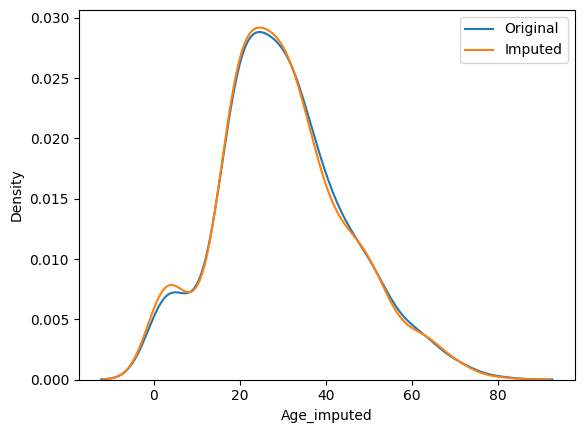

In [43]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [45]:
print(X_train["Age"].var())
print(X_train["Age_imputed"].var())

220.7125508594779
223.08935168065236


In [46]:
X_train.cov()

,Age,Fare,Age_imputed
Age,220.712551,74.406949,220.712551
Fare,74.406949,2144.981210,63.401909
Age_imputed,220.712551,63.401909,223.089352


<Axes: >

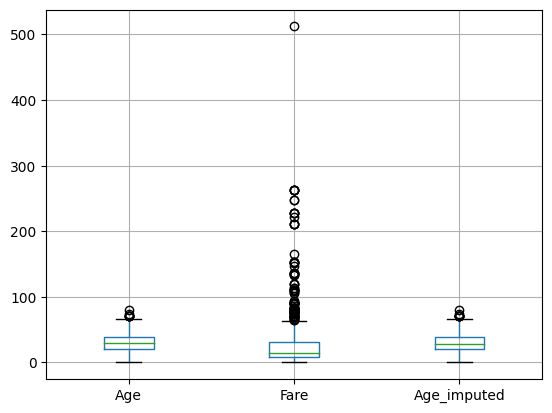

In [47]:
X_train.boxplot()

<h3>Random value imputation for categorical data</h3>

In [49]:
data = pd.read_csv("house_train.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [50]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [51]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["SalePrice"]),data["SalePrice"],random_state=42,test_size=0.2)

In [52]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [53]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


In [59]:
# we have to see the frequency of every category of data before imputation and after imputation
temp = pd.concat([
    X_train["GarageQual"].value_counts()/len(X_train["GarageQual"].dropna()),
    X_train["GarageQual_imputed"].value_counts()/len(X_train["GarageQual"])
],axis = 1)
temp.columns=["original","imputed"]

In [60]:
# there is not much change in frequency of original and imputed data
temp

,original,imputed
TA,0.951087,0.952055
Fa,0.032609,0.032534
Gd,0.011775,0.011130
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [61]:
temp1 = pd.concat([
    X_train["FireplaceQu"].value_counts()/len(X_train["FireplaceQu"].dropna()),
    X_train["FireplaceQu_imputed"].value_counts()/len(X_train["FireplaceQu"])
],axis = 1)
temp1.columns=["original","imputed"]

In [62]:
# there is much more change so we should not use this method of imputation in FirePlaceQu column
temp1

,original,imputed
Gd,0.491143,0.497432
TA,0.405797,0.398973
Fa,0.043478,0.041952
Ex,0.033816,0.035103
Po,0.025765,0.026541
